###### Introduction: Web Scraping with Beautiful Soup
###### Web scraping is the process of extracting data from websites programmatically. 
###### In this project, we will use **Beautiful Soup** (a powerful python library) to scrape data from the **Amazon Bestsellers in Books** webpage. The primary goal is to extract meaningful information such as:
###### - Book titles
###### - Authors
###### - Ratings
###### - Number of customer reviews
###### - Prices
###### This extracted data is further processed and analyzed to gain insights into popular books, pricing patterns, and customer preferences.


In [1]:
#import necessary files
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Base URL for Amazon Bestsellers
base_url = "https://www.amazon.in/gp/bestsellers/books"

# Set up headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

# Function to scrape a single page
def scrape_page(page_number):
    # Append pagination parameters to the base URL
    if page_number == 1:
        url = base_url
    else:
        url = f"{base_url}/ref=zg_bs_pg_{page_number}?_encoding=UTF8&pg={page_number}"

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find all book containers
    books = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")
    page_data = []
    
    # Looping through each book container
    for book in books:
        try:
            # Extract title
            title_tag = book.find("div", class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")
            title = title_tag.text.strip() if title_tag else None

            # Extract author
            author_tag = book.find("div", class_="a-row a-size-small")
            author = author_tag.text.strip() if author_tag else None

            # Extract rating
            rating_tag = book.find("span", class_="a-icon-alt")
            rating = rating_tag.text.split()[0] if rating_tag else None

            # Extract number of customer ratings
            customers_rated_tag = book.select_one("span.a-size-small")
            customers_rated = (
                customers_rated_tag.text.strip().replace(",", "")
                if customers_rated_tag
                else None
            )


            # Extract price
            price_tag = book.find("span", class_="_cDEzb_p13n-sc-price_3mJ9Z")
            price = (
                price_tag.text.strip().replace("₹", "").replace(",", "")
                if price_tag
                else None
            )


            # Append the extracted data to the list
            page_data.append({
                "Title": title,
                "Author": author,
                "Rating": rating,
                "Customers Rated": customers_rated,
                "Price": price,
            })

        except Exception as e:
            print(f"Error extracting data for a book: {e}")
    
    return page_data
# Measure processing time
start_time = time.time()

# Scrape both pages
all_data = []

for page in range(1, 3):
    print(f"Scraping page {page}...")
    page_data = scrape_page(page)
    all_data.extend(page_data)

# Convert to a DataFrame for easier analysis
best_seller = pd.DataFrame(all_data)

# Save to a CSV file
output_file = "amazon_bestsellers_beautiful_soup.csv"
best_seller.to_csv(output_file, index=False)

# Calculate and print processing time
end_time = time.time()
processing_time = end_time - start_time

print(f"File saved as {output_file}")
print(f"\nTime taken to process: {processing_time:.2f} seconds")


Scraping page 1...
Scraping page 2...
File saved as amazon_bestsellers_beautiful_soup.csv

Time taken to process: 2.89 seconds


In [3]:
#Display Data
best_seller.head(11)

,Title,Author,Rating,Customers Rated,Price
0,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8,1156,220.00
1,The Psychology of Money,Morgan Housel,4.6,67786,318.00
2,PW CBSE | Class 10 | 15 New Pattern Sample Pap...,PW (Physics Wallah),4.7,PW (Physics Wallah),999.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,80805,399.00
4,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6,270,1362.00
5,Oswaal CBSE Sample Question Papers Class 10 Sc...,Oswaal Editorial Board,4.5,44,350.00
6,Educart CBSE Sample Paper Class 10 2024-25 - S...,Educart,4.8,119,1534.00
7,Educart CBSE Science Class 10 Sample Papers 20...,Prashant Kirad,4.6,Prashant Kirad,383.00
8,Atomic Habits,James Clear,4.6,98915,460.00
9,The Satvic Revolution: 7 Life-Changing Habits ...,Subah Saraf,4.8,995,323.00


#### EDA - Exploratory Data Analysis

In [4]:
# Display the shape (rows and columns)
print(f"Shape: {best_seller.shape}")

# Display column information
print("\nColumn Info:")
best_seller.info()


Shape: (60, 5)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            60 non-null     object
 1   Author           60 non-null     object
 2   Rating           57 non-null     object
 3   Customers Rated  60 non-null     object
 4   Price            60 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [5]:
# Convert columns 'Rating', 'Customers Rated', 'Price' to numeric type using pd.to_numeric.
best_seller = best_seller.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name in ['Rating', 'Customers Rated', 'Price'] else col)

In [6]:
# Display Data information
best_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            60 non-null     object 
 1   Author           60 non-null     object 
 2   Rating           57 non-null     float64
 3   Customers Rated  44 non-null     float64
 4   Price            60 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.5+ KB


In [7]:
# check for null values
print(best_seller.isnull().sum())

Title               0
Author              0
Rating              3
Customers Rated    16
Price               0
dtype: int64


In [8]:
best_seller['Customers Rated'] = best_seller['Customers Rated'].fillna(0).astype(int) 

In [9]:
# check for null values
print(best_seller.isnull().sum())

Title              0
Author             0
Rating             3
Customers Rated    0
Price              0
dtype: int64


In [10]:
print(best_seller[best_seller['Rating'].isnull()]) 

            Title         Author  Rating  Customers Rated  Price
24      Om Pandey      Om Pandey     NaN                0  423.0
51   Jasmine Shah   Jasmine Shah     NaN                0  584.0
56  Manu S Pillai  Manu S Pillai     NaN                0  707.0


In [11]:
best_seller = best_seller.dropna(subset=['Rating'])

# Verify the changes
print(best_seller.isnull().sum()) 

Title              0
Author             0
Rating             0
Customers Rated    0
Price              0
dtype: int64


In [12]:
best_seller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 59
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            57 non-null     object 
 1   Author           57 non-null     object 
 2   Rating           57 non-null     float64
 3   Customers Rated  57 non-null     int32  
 4   Price            57 non-null     float64
dtypes: float64(2), int32(1), object(2)
memory usage: 2.4+ KB


In [13]:
best_seller.head()

,Title,Author,Rating,Customers Rated,Price
0,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8,1156,220.0
1,The Psychology of Money,Morgan Housel,4.6,67786,318.0
2,PW CBSE | Class 10 | 15 New Pattern Sample Pap...,PW (Physics Wallah),4.7,0,999.0
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,80805,399.0
4,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6,270,1362.0


In [14]:
best_seller.tail()

,Title,Author,Rating,Customers Rated,Price
54,PW CBSE | Class 10 | 15 New Pattern Sample Que...,PW (Physics Wallah),4.2,0,241.0
55,PW All in one RRB NTPC 2024-2025 CBT - 1 Exam ...,PW,3.9,0,295.0
57,The Golden Road : How Ancient India Transforme...,Wlliam Dalrymple,4.6,0,677.0
58,Oswaal CBSE Question Bank Class 10 Social Scie...,Oswaal Editorial Board,4.5,345,556.0
59,Gurukul by Oswal ICSE 10 Years Solved Papers C...,Oswal Publishers,4.7,132,849.0


### Q1: Authors with Highest Priced Book (i.e., based on price)

##### Bar Graph

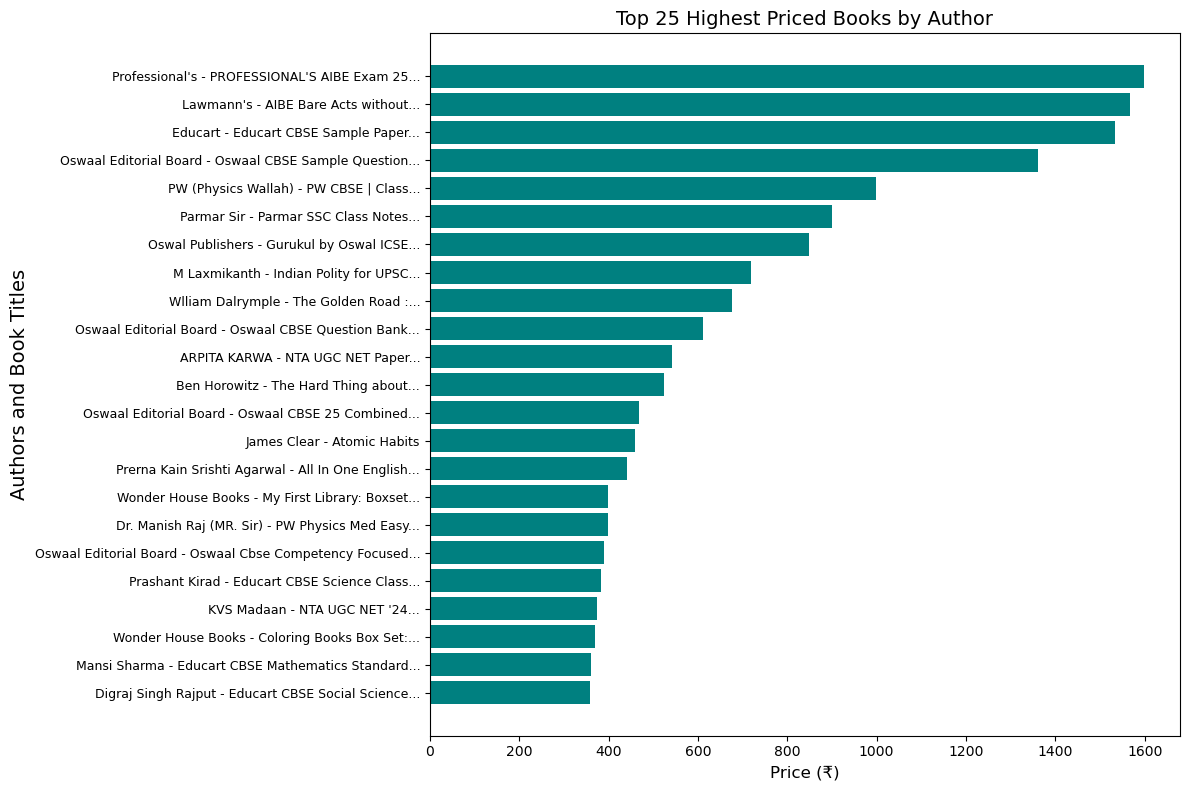

In [15]:
import matplotlib.pyplot as plt

# Get the top 25 highest-priced books and their authors
top_25_highest_priced = best_seller.sort_values(by="Price", ascending=False).head(25)

# Limit book titles to the first 3 words
top_25_highest_priced['Short_Title'] = top_25_highest_priced['Title'].apply(lambda x: ' '.join(x.split()[:4]) + '...' if len(x.split()) > 4 else x)

# Combine author and truncated book title for y-axis labels
top_25_highest_priced['Author_Title'] = top_25_highest_priced['Author'] + ' - ' + top_25_highest_priced['Short_Title']

# Plot a bar diagram
plt.figure(figsize=(12, 8)) 
plt.barh(top_25_highest_priced['Author_Title'], top_25_highest_priced['Price'], color='teal')
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Authors and Book Titles', fontsize=14)
plt.title('Top 25 Highest Priced Books by Author', fontsize=14)
plt.gca().invert_yaxis() 
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


##### Data Frame

In [16]:
top_25_highest_priced.head()

,Title,Author,Rating,Customers Rated,Price,Short_Title,Author_Title
29,PROFESSIONAL'S AIBE Exam 25 Bare Acts Set with...,Professional's,4.1,192,1599.0,PROFESSIONAL'S AIBE Exam 25...,Professional's - PROFESSIONAL'S AIBE Exam 25...
35,AIBE Bare Acts without Notes | 25 Books Set Co...,Lawmann's,4.3,0,1568.0,AIBE Bare Acts without...,Lawmann's - AIBE Bare Acts without...
6,Educart CBSE Sample Paper Class 10 2024-25 - S...,Educart,4.8,119,1534.0,Educart CBSE Sample Paper...,Educart - Educart CBSE Sample Paper...
4,Oswaal CBSE Sample Question Papers Class 10 En...,Oswaal Editorial Board,4.6,270,1362.0,Oswaal CBSE Sample Question...,Oswaal Editorial Board - Oswaal CBSE Sample Qu...
2,PW CBSE | Class 10 | 15 New Pattern Sample Pap...,PW (Physics Wallah),4.7,0,999.0,PW CBSE | Class...,PW (Physics Wallah) - PW CBSE | Class...


###  Top Rated Books and Authors with respect to the highest customers rating

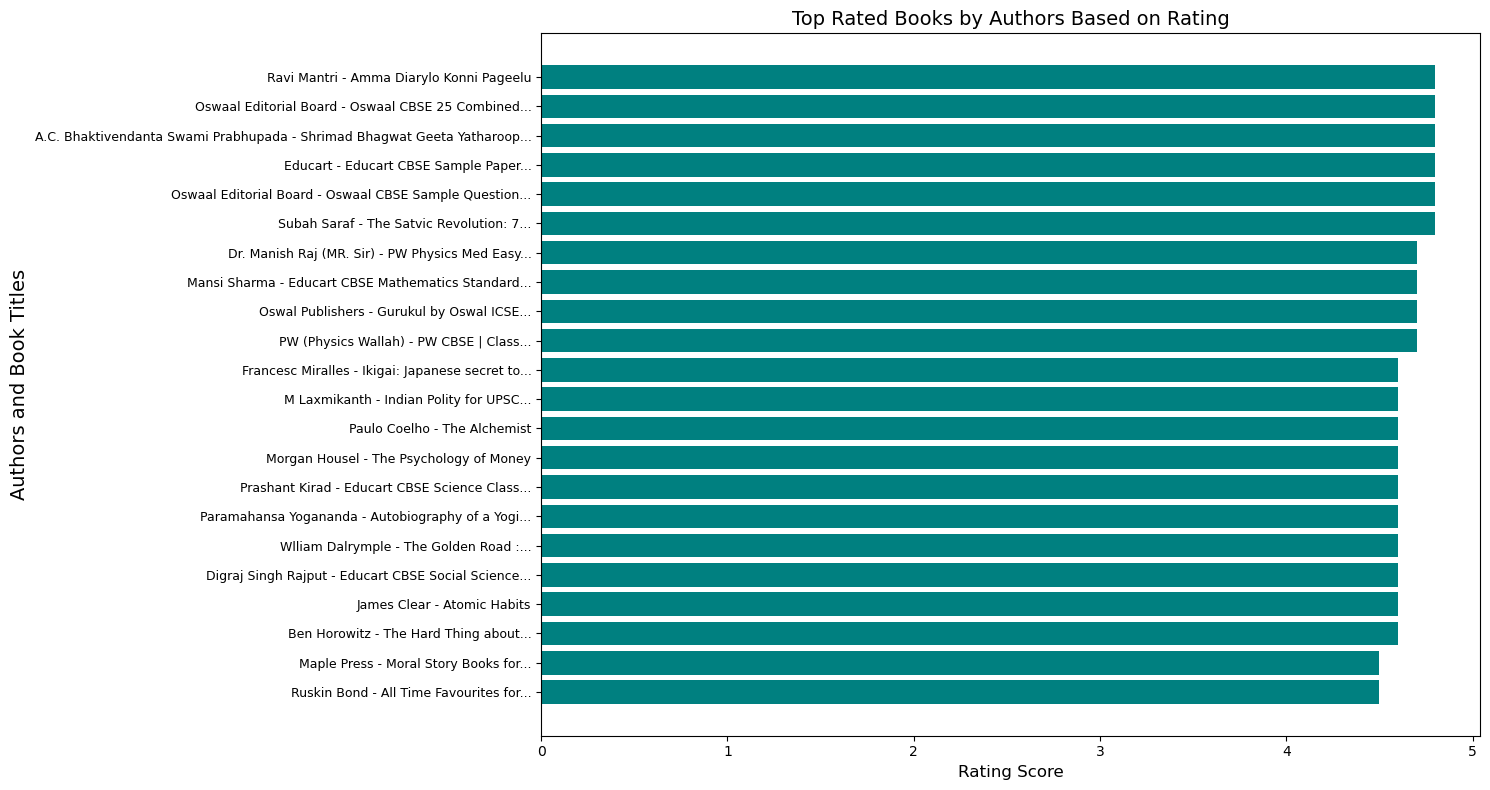

In [17]:
# Sort by Rating in descending order
top_rated_books = best_seller.sort_values(by='Rating', ascending=False).head(25)

# Combine author and truncated book title for y-axis labels 
top_rated_books['Short_Title'] = top_rated_books['Title'].apply(
    lambda x: ' '.join(x.split()[:4]) + '...' if len(x.split()) > 4 else x
)
top_rated_books['Author_Title'] = top_rated_books['Author'] + ' - ' + top_rated_books['Short_Title']

# Plot a bar chart
plt.figure(figsize=(15, 8))
plt.barh(top_rated_books['Author_Title'], top_rated_books['Rating'], color='teal')
plt.xlabel('Rating Score', fontsize=12)
plt.ylabel('Authors and Book Titles', fontsize=14)
plt.title('Top Rated Books by Authors Based on Rating', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest-rated book at the top
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

##### Data Frame

In [18]:
top_rated_books.head()

,Title,Author,Rating,Customers Rated,Price,Short_Title,Author_Title
0,Amma Diarylo Konni Pageelu,Ravi Mantri,4.8,1156,220.0,Amma Diarylo Konni Pageelu,Ravi Mantri - Amma Diarylo Konni Pageelu
12,Oswaal CBSE 25 Combined Sample Question Papers...,Oswaal Editorial Board,4.8,0,469.0,Oswaal CBSE 25 Combined...,Oswaal Editorial Board - Oswaal CBSE 25 Combin...
53,Shrimad Bhagwat Geeta Yatharoop (Hindi),A.C. Bhaktivendanta Swami Prabhupada,4.8,20375,222.3,Shrimad Bhagwat Geeta Yatharoop...,A.C. Bhaktivendanta Swami Prabhupada - Shrimad...
42,Oswaal CBSE 25 Combined Sample Question papers...,Oswaal Editorial Board,4.8,101,437.0,Oswaal CBSE 25 Combined...,Oswaal Editorial Board - Oswaal CBSE 25 Combin...
6,Educart CBSE Sample Paper Class 10 2024-25 - S...,Educart,4.8,119,1534.0,Educart CBSE Sample Paper...,Educart - Educart CBSE Sample Paper...


### Q3: Topmost Customer Rated Authors and Books based on number of customers)

In [19]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
from bokeh.palettes import d3
from bokeh.models import ColumnDataSource


# Ensure 'Customers Rated' is numeric
best_seller['Customers Rated'] = pd.to_numeric(best_seller['Customers Rated'], errors='coerce')

# Sort by 'Customers Rated' in descending order and pick top 15
top_customers_rated = best_seller.sort_values(by='Customers Rated', ascending=False).head(15)


# Combine author and truncated book title for visualization labels
top_customers_rated['Short_Title'] = top_customers_rated['Title'].apply(
    lambda x: ' '.join(x.split()[:4]) + '...' if len(x.split()) > 4 else x
)
top_customers_rated['Author_Title'] = top_customers_rated['Author'] + ' - ' + top_customers_rated['Short_Title']

# Use a Bokeh palette for colors
colors = d3['Category20'][15]  # Use a palette with 15 distinct colors

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data=dict(
    titles=top_customers_rated['Author_Title'],
    customers=top_customers_rated['Customers Rated'],
    color=colors[:len(top_customers_rated)]
))

# Create a horizontal bar plot
p = figure(
    y_range=top_customers_rated['Author_Title'],
    x_axis_label='Number of Customers Rated',
    title='Top Customer Rated Books by Authors',
    height=500,
    width=1100,
    tools="pan,box_zoom,reset,save"
)

p.hbar(
    y='titles',
    right='customers',
    height=0.6,
    color='color',
    source=source,
    legend_field='titles'
)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = "14pt"
p.legend.visible = False


# Display the plot in a notebook
output_notebook()
show(p, notebook_handle=True)


Loading BokehJS ...

In [20]:
top_customers_rated.head()

,Title,Author,Rating,Customers Rated,Price,Short_Title,Author_Title
34,The Alchemist,Paulo Coelho,4.6,113863,259.0,The Alchemist,Paulo Coelho - The Alchemist
8,Atomic Habits,James Clear,4.6,98915,460.0,Atomic Habits,James Clear - Atomic Habits
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,80805,399.0,My First Library: Boxset...,Wonder House Books - My First Library: Boxset...
1,The Psychology of Money,Morgan Housel,4.6,67786,318.0,The Psychology of Money,Morgan Housel - The Psychology of Money
21,Ikigai: Japanese secret to long and happy life,Francesc Miralles,4.6,56549,322.0,Ikigai: Japanese secret to...,Francesc Miralles - Ikigai: Japanese secret to...
